# EDA for **Bpd** Before and After Pandemic

## Import packages

In [1]:
import pandas as pd
import numpy as np
import altair as alt
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

## Import data set

In [2]:
bpd_pre = pd.read_csv('../../data/bpd_pre_features_tfidf_256.csv')
bpd_post = pd.read_csv('../../data/bpd_post_features_tfidf_256.csv')

## Filter feature of interest: substance_use_total

In [3]:
bpd_pre = bpd_pre.loc[:, ['subreddit', 'author', 'date', 'post', 'substance_use_total']]
bpd_post = bpd_post.loc[:, ['subreddit', 'author', 'date', 'post', 'substance_use_total']]

## Pre-Pandemic data set

In [4]:
bpd_pre.head(5)

,subreddit,author,date,post,substance_use_total
0,bpd,madamegeoffrin,2019/03/14,"Being Alone Hi all,\n\nI live alone and am hav...",0
1,bpd,chikkinnugget,2019/03/14,I don’t know what to do anymore. I have been w...,0
2,bpd,Nonsense_constance,2019/03/14,Relapsing. Can't stop obsessing over ex. I'm d...,0
3,bpd,sras5462,2019/03/14,I think I have Bpd and it scares me A little ...,1
4,bpd,TrAiLeRpArKgIrLl,2019/03/14,Does anyone else actually like themselves or a...,0


In [5]:
bpd_pre.tail(5)

,subreddit,author,date,post,substance_use_total
11002,bpd,Goldenking99,2019/06/05,DAE get really anxious and depressed when peop...,0
11003,bpd,norther-nice,2019/06/05,Anger. My girlfriend’s car’s battery died two ...,0
11004,bpd,tree_is_free,2019/06/05,Hi I was married to a man with BPD. He's divor...,0
11005,bpd,Hidinginthewoodpile,2019/06/05,"Spiraling anger tornado. Ok, I'm male and my w...",0
11006,bpd,soykenopsia,2019/06/05,is this normal I tend to look at the people i ...,0


In [6]:
print(f'Total number of records in the pre-pandemic dataset: {len(bpd_pre)}')

Total number of records in the pre-pandemic dataset: 11007


## Post-Pandemic data set

In [7]:
bpd_post.head(5)

,subreddit,author,date,post,substance_use_total
0,bpd,Komorxbi,2020/01/01,Instant infatuation. Do you guys ever meet som...,0
1,bpd,IodineSky111,2020/01/01,Anyone else believe they have this disorder fr...,0
2,bpd,mellbell14,2020/01/01,Am I the only one? Am I the only one who can’t...,0
3,bpd,femaleking51,2020/01/01,I want this feeling to last I'm happy with how...,1
4,bpd,prodbudddwyer,2020/01/01,"BPD I'm here to learn, I would Google it but I...",0


In [8]:
bpd_post.tail(5)

,subreddit,author,date,post,substance_use_total
5968,bpd,techtay,2020/04/20,Diagnosis Q Any psychology experts in here ple...,0
5969,bpd,wholeassmeal,2020/04/20,BPD makes me compare myself to other women...a...,0
5970,bpd,ragerdemon,2020/04/20,How do you guys find out who you are? Sticking...,0
5971,bpd,pubertino12,2020/04/20,My FP finally ghosted me I've known him for 6 ...,0
5972,bpd,ThisIsMyFifthAcc,2020/04/20,Anyone else struggle a lot with shame It has i...,1


In [9]:
print(f'Total number of records in the post-pandemic dataset: {len(bpd_post)}')

Total number of records in the post-pandemic dataset: 5973


## High Level Analysis of Pre and Post Pandemic datasets

First we'll combine the two dataset into one--which will make it easier to compare:

In [10]:
bpd_pre['period'] = 'pre'
bpd_post['period'] = 'post'

bpd_df = pd.concat([bpd_pre, bpd_post])
bpd_df

,subreddit,author,date,post,substance_use_total,period
0,bpd,madamegeoffrin,2019/03/14,"Being Alone Hi all,\n\nI live alone and am hav...",0,pre
1,bpd,chikkinnugget,2019/03/14,I don’t know what to do anymore. I have been w...,0,pre
2,bpd,Nonsense_constance,2019/03/14,Relapsing. Can't stop obsessing over ex. I'm d...,0,pre
3,bpd,sras5462,2019/03/14,I think I have Bpd and it scares me A little ...,1,pre
4,bpd,TrAiLeRpArKgIrLl,2019/03/14,Does anyone else actually like themselves or a...,0,pre
...,...,...,...,...,...,...
5968,bpd,techtay,2020/04/20,Diagnosis Q Any psychology experts in here ple...,0,post
5969,bpd,wholeassmeal,2020/04/20,BPD makes me compare myself to other women...a...,0,post
5970,bpd,ragerdemon,2020/04/20,How do you guys find out who you are? Sticking...,0,post
5971,bpd,pubertino12,2020/04/20,My FP finally ghosted me I've known him for 6 ...,0,post


In [11]:
pd.concat([bpd_pre.describe(), bpd_post.describe()], axis=1)

,substance_use_total,substance_use_total
count,11007.000000,5973.000000
mean,0.477787,0.478319
std,1.024873,0.996683
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,14.000000,13.000000


### Visualization

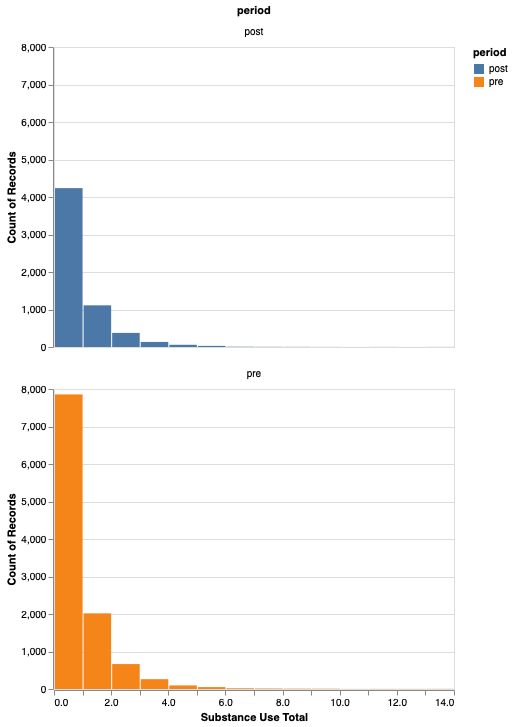

In [12]:
alt.Chart(bpd_df).mark_bar().encode(
    x=alt.X('substance_use_total', bin=alt.Bin(maxbins=20), title = 'Substance Use Total'),
    y='count()',
    color='period'
).facet('period', columns=1)

In [13]:
print(f"Number of unique authors (posters) in 'pre' dataset: {len(bpd_pre.author.unique())}")
print(f"Number of unique authors (posters) in 'post' dataset: {len(bpd_post.author.unique())}")

Number of unique authors (posters) in 'pre' dataset: 11007
Number of unique authors (posters) in 'post' dataset: 5973


1. Every records in the dataset is associated with an unique author
2. The number of unique authors before the pandemic is around twice as the after pandemic data
3. The mean of the substance use total before pandemic is slightly slower than after pandemic